# Temperature Data

In [1]:
import sys
sys.path.append("..")
import os 
import glob
import netCDF4
from data import BavarianCrops, BreizhCrops, SustainbenchCrops, ModisCDL
from utils.temperature_data.load import get_time_data, get_temperature_data, get_lon_data, get_lat_data, load_nc_files

In [2]:
elects_data_root = os.path.join(os.environ.get("HOME", os.environ.get("USERPROFILE")), "elects_data")
data_path = os.path.join(elects_data_root, "temperature")
# Example usage
nc_datasets = load_nc_files(datapath=data_path)
print("length: ", len(nc_datasets))


length:  365


In [3]:
nc_datasets[0].variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     _FillValue: nan
     standard_name: time
     long_name: time
     axis: T
     units: days since 1900-01-01
     calendar: proleptic_gregorian
 unlimited dimensions: time
 current shape = (1,)
 filling on,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     _FillValue: nan
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (44,)
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     _FillValue: nan
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (21,)
 filling on,
 'Temperature_Air_2m_Mean_24h': <class 'netCDF4._netCDF4.Variable'>
 float32 Temperature_Air_2m_Mean_24h(time, lat, lon)
     _FillValue: -9999.0
     long_name: 2 meter air temperature (00-00LT)
     units: K
     temporal_aggregation: Mean 00-00LT


In [4]:
nc_datasets[5].variables["Temperature_Air_2m_Mean_24h"]

<class 'netCDF4._netCDF4.Variable'>
float32 Temperature_Air_2m_Mean_24h(time, lat, lon)
    _FillValue: -9999.0
    long_name: 2 meter air temperature (00-00LT)
    units: K
    temporal_aggregation: Mean 00-00LT
    missing_value: -9999.0
unlimited dimensions: time
current shape = (1, 21, 44)
filling on

In [7]:
# Example usage:
# Assuming 'nc_datasets' is a list of datasets loaded previously
temperature_data = get_temperature_data(nc_datasets[5])
print("temperature_data: ", temperature_data, "\nshape: ", temperature_data.shape)
print("-"*50)
print("time_data: ", get_time_data(nc_datasets[5]), "\nshape: ", get_time_data(nc_datasets[5]).shape)
print("-"*50)
print("lon_data: ", get_lon_data(nc_datasets[5]), "\nshape: ", get_lon_data(nc_datasets[5]).shape)
print("-"*50)
print("lat_data: ", get_lat_data(nc_datasets[5]), "\nshape: ", get_lat_data(nc_datasets[5]).shape)

temperature_data:  [[[      nan       nan       nan       nan       nan       nan       nan
         nan       nan       nan       nan 280.57535 280.5301  280.49338
   280.21536 280.16452 279.81317 279.76364 279.70728 279.67172 279.60358
   279.5542        nan       nan       nan       nan       nan       nan
         nan       nan 278.91998 278.7029  278.5821  278.56976 278.0746
   276.7072  274.77612 274.0438  273.7621  273.6293  273.47308 273.28598
   273.24997 273.12494]
  [      nan       nan       nan       nan       nan       nan       nan
         nan       nan       nan       nan 280.525   280.4785  280.42902
   280.00583 279.7701  279.17758 278.9491  278.82962 278.77786 278.8597
   278.98413       nan       nan       nan       nan       nan       nan
         nan       nan 278.78607 278.51212 278.39185 278.4236  277.95898
   276.6382  274.64813 273.85077 273.53543 273.41583 273.27997 273.0588
   273.03104 272.9501 ]
  [      nan       nan       nan       nan       nan       n

## Link temperature data to breizhcrops data

In [8]:
breizhcrops_path = os.path.join(elects_data_root, "breizhcrops")
sequence_length=150
test_ds = BreizhCrops(root=breizhcrops_path,partition="eval", sequencelength=sequence_length, return_id=True, year=2017)


1555075632 1555075632


loading data into RAM: 100%|██████████| 122614/122614 [00:44<00:00, 2773.70it/s]


In [9]:
CRS = 4326
gdf = test_ds.ds.geodataframe().to_crs(CRS)


c:\Users\anyam\Desktop\Master_thesis\Code\elects\EDA\..\data\breizhcrops.py:320: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  geodataframe["geometry"] = geom["geometry"]


Visualise the data: 

<Axes: >

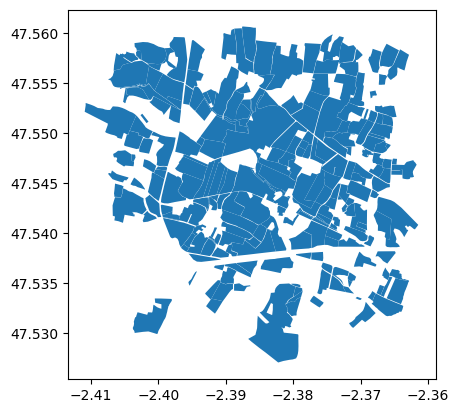

In [10]:
import geopandas as gpd
from shapely.geometry import Polygon

coords = [[-2.4051745919139944, 47.55745967351906],
          [-2.4051745919139944, 47.53283666582435],
          [-2.365263321772393, 47.53283666582435],
          [-2.365263321772393, 47.55745967351906]]

polygon_geom = Polygon(coords)


polygon = gpd.GeoDataFrame(index=[0], crs=4326, geometry=[polygon_geom])
fields = gdf.sjoin(polygon, how="inner")
fields.plot()

In [11]:
gdf['geometry'] = gdf['geometry'].to_crs(CRS)

In [12]:
gdf['geometry'][0].bounds

(-3.168797497829379, 48.00909406017647, -3.168064819698224, 48.00959964246388)